In [2]:
import sklearn as skl
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = load_iris(as_frame=True)
print(dataset.keys
      ())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
X:pd.DataFrame = dataset.data
old_names= X.columns
for old_name in old_names:
    X.rename(columns={old_name:old_name[:-5]},inplace=True)

/tmp/ipykernel_28361/2377337411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={old_name:old_name[:-5]},inplace=True)
/tmp/ipykernel_28361/2377337411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={old_name:old_name[:-5]},inplace=True)
/tmp/ipykernel_28361/2377337411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={old_name:old_name[:-5]},inplace=True)
/tmp/ipykernel_2836

In [4]:
from itertools import combinations, cycle, islice

pairs = list(combinations(X.columns,2))
print(pairs)
X.head(n=3)

[('sepal length', 'sepal width'), ('sepal length', 'petal length'), ('sepal length', 'petal width'), ('sepal width', 'petal length'), ('sepal width', 'petal width'), ('petal length', 'petal width')]


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


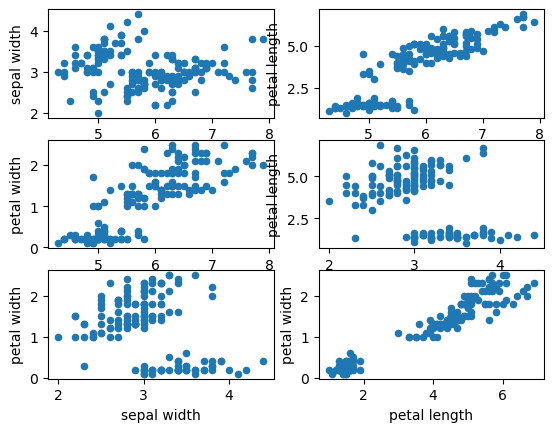

In [5]:
fig, axs = plt.subplots(nrows=3,ncols=2)

for idx,pair in enumerate(pairs):
    X.plot(kind="scatter", x=pair[0],y=pair[1],ax=axs[idx//2, idx%2])


# K-means++ clustering

In [6]:
from sklearn.cluster import KMeans
train_frac=0.75
k=len(dataset.target_names)
k_means = KMeans(
    n_clusters=k,
    n_init="auto",
    random_state=0,
).fit(X)
y_pred=k_means.labels_
print("K-means fit summary")
print(f"Cluster centers are at: {k_means.cluster_centers_}")
print(f"Cluster predictions: {y_pred}")

K-means fit summary
Cluster centers are at: [[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
Cluster predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


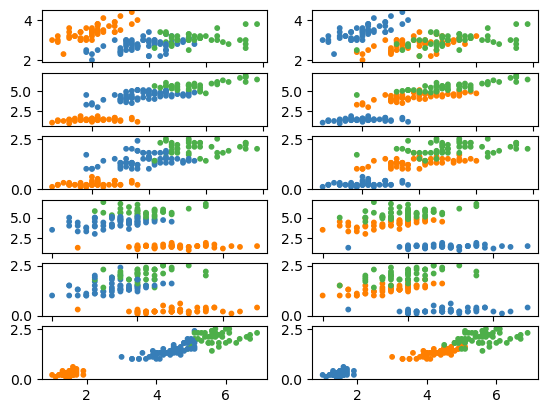

In [7]:
colors = np.array(
     list(
         islice(
             cycle(
                 [
                     "#377eb8",
                     "#ff7f00",
                     "#4daf4a",
                     "#f781bf",
                     "#a65628",
                     "#984ea3",
                     "#999999",
                     "#e41a1c",
                     "#dede00",
                 ]
             ),
             int(max(y_pred) + 1),
         )
     )
)
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
fig, axs = plt.subplots(nrows=len(pairs),ncols=2)
for idx,pair in enumerate(pairs):
    axs[idx, 0].scatter(X.loc[:, pair[0]], X.loc[:, pair[1]], s=10, color=colors[y_pred])
    axs[idx, 1].scatter(X.loc[:, pair[0]], X.loc[:, pair[1]], s=10, color=colors[dataset.target])
plt.show()

# Gaussian Mixture Model

In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=k,
    random_state=0
).fit(X)
y_pred_m=gmm.predict(X)
print("Gaussian Mixture fit summary")
print(f"Cluster centers are at: {gmm.means_}")
print(f"Cluster predictions: {y_pred_m}")

Gaussian Mixture fit summary
Cluster centers are at: [[5.9170732  2.77804839 4.20540364 1.29848217]
 [5.006      3.428      1.462      0.246     ]
 [6.54639415 2.94946365 5.48364578 1.98726565]]
Cluster predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


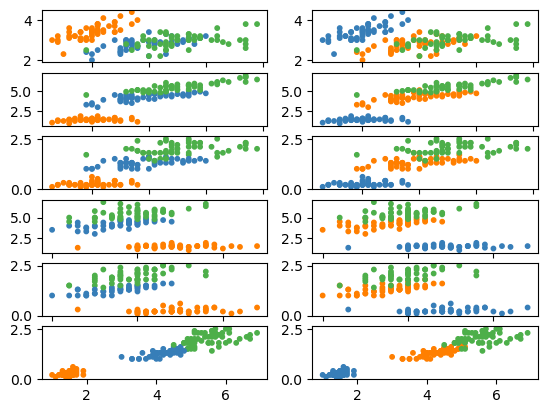

In [9]:
fig, axs = plt.subplots(nrows=len(pairs),ncols=2)
for idx,pair in enumerate(pairs):
    axs[idx, 0].scatter(X.loc[:, pair[0]], X.loc[:, pair[1]], s=10, color=colors[y_pred_m])
    axs[idx, 1].scatter(X.loc[:, pair[0]], X.loc[:, pair[1]], s=10, color=colors[dataset.target])
plt.show()

In [10]:
print(X.quantile(0.25).values )
print(X.quantile(0.75).values)

[5.1 2.8 1.6 0.3]
[6.4 3.3 5.1 1.8]


# K-means clustering (random initialization)

In [21]:
from numpy.typing import NDArray
from typing import List
class KMeans_cam:
    def __init__(self,n_components:int,n_init,num_reps:int):
        self.n_components=n_components
        self.n_init= n_init
        self.num_reps=num_reps
        self.labels=None
        self.centers=None

    def _dist2(self,center, X:pd.DataFrame)->NDArray: pass

    def _nearest_center(self,X:pd.DataFrame, means:List[NDArray]):
        dist = np.zeros(shape=(X.shape[0], len(means)))
        for k, center in enumerate(means):
            dist[:,k] = np.linalg.norm( np.array(X)-center, axis=1 )#np.dot(np.array(X),center)
        return np.argmin(dist,axis=1)

    def _init_means(self, X: pd.DataFrame, strategy:str='random',):

        if strategy=="random":
            means=np.zeros(
                shape=(self.n_components,X.shape[1])
            )
            for k in range(self.n_components):
                means[k,:] = np.random.uniform(
                    low=X.quantile(0.25).values,
                    high=X.quantile(0.75).values,
                )
        else: raise NotImplementedError("To be implemented soon.")
        return means

    def fit(self,X:pd.DataFrame):
        for _ in range(self.num_reps):
            #Initialize means
            means = self._init_means(X)
            s = np.zeros((X.shape[0],self.n_components))

            #Update Centers
            t=self._nearest_center(X,means)
            for n in range(X.shape[0]):
                s[n,t[n]]=1

            #Update Means
            for k in range(self.n_components):
                points = X.loc[s[:,k]==1]
                means[k] = np.array(points.mean())
        self.labels = np.argmax(s,axis=1)
        self.centers = means
        #Return the cluster
        return self

In [19]:
km = KMeans_cam(3,1,100).fit(X)
print(km.labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 2
 1 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


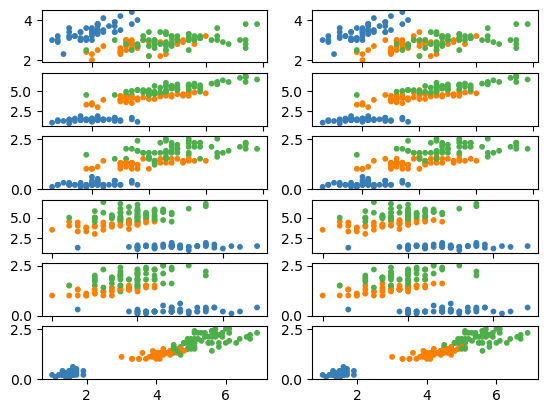

In [22]:
fig, axs = plt.subplots(nrows=len(pairs),ncols=2)
for idx,pair in enumerate(pairs):
    axs[idx, 0].scatter(X.loc[:, pair[0]], X.loc[:, pair[1]], s=10, color=colors[km.labels])
    axs[idx, 1].scatter(X.loc[:, pair[0]], X.loc[:, pair[1]], s=10, color=colors[dataset.target])
plt.show()